In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()#checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#we can see many null valueas

In [6]:
#we can see loan id is not needed

In [7]:
df=df.drop(columns=['Loan_ID'])

In [8]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df.ApplicantIncome.unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [14]:
df.CoapplicantIncome.unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [15]:
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [16]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [17]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [19]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
si=SimpleImputer(strategy="most_frequent")
knn=KNNImputer()
ite=IterativeImputer()

In [21]:
ot=make_column_transformer((si,['Gender']),remainder='passthrough')
df.Gender=ot.fit_transform(df)

In [22]:
tt=make_column_transformer((si,['Married']),remainder='passthrough')
df.Married=tt.fit_transform(df)

In [23]:
ct=make_column_transformer((si,['Dependents']),remainder='passthrough')
df.Dependents=ct.fit_transform(df)

In [24]:
dt=make_column_transformer((si,['Self_Employed']),remainder='passthrough')
df.Self_Employed=dt.fit_transform(df)

In [25]:
si=SimpleImputer(strategy='mean')

In [26]:
et=make_column_transformer((si,['LoanAmount']),remainder='passthrough')
df.LoanAmount=et.fit_transform(df)

In [27]:
jt=make_column_transformer((si,['Loan_Amount_Term']),remainder='passthrough')
df.Loan_Amount_Term=jt.fit_transform(df)

In [28]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [29]:
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [30]:
si=SimpleImputer(strategy="most_frequent")

In [31]:
kt=make_column_transformer((si,['Credit_History']),remainder='passthrough')
df.Credit_History=kt.fit_transform(df)

In [32]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
#so we have filled the null values

In [34]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [36]:
#visualization techniqes

In [37]:
df.describe().T#first lets analys

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0


In [38]:
#we can see that applicant in come range from 150 to81000
#and coapplicant income range from 0 to 41667

Male      502
Female    112
Name: Gender, dtype: int64


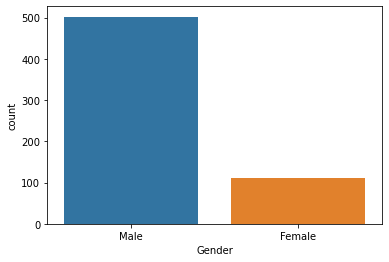

In [41]:
ax=sns.countplot(x='Gender',data=df)
print(df["Gender"].value_counts())

In [40]:
#we can see maleapplicants are more 

Yes    401
No     213
Name: Married, dtype: int64


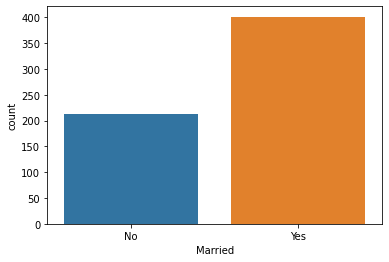

In [42]:
ax=sns.countplot(x='Married',data=df)
print(df["Married"].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


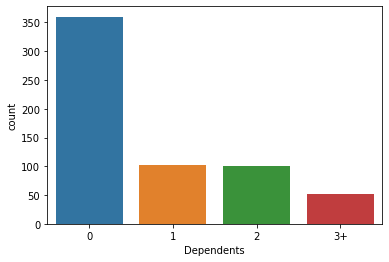

In [43]:
ax=sns.countplot(x='Dependents',data=df)
print(df["Dependents"].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


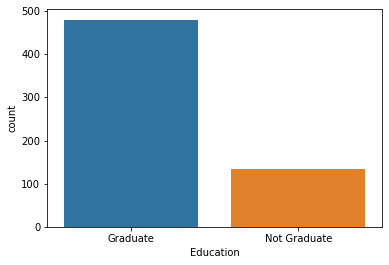

In [44]:
ax=sns.countplot(x='Education',data=df)
print(df["Education"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


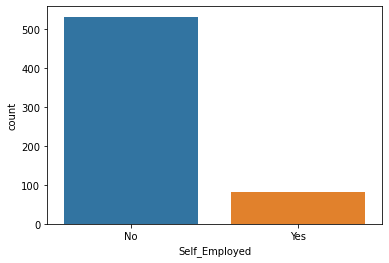

In [45]:
ax=sns.countplot(x='Self_Employed',data=df)
print(df["Self_Employed"].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


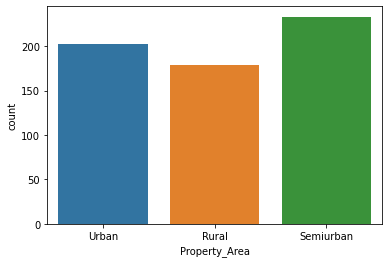

In [46]:
ax=sns.countplot(x='Property_Area',data=df)
print(df["Property_Area"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


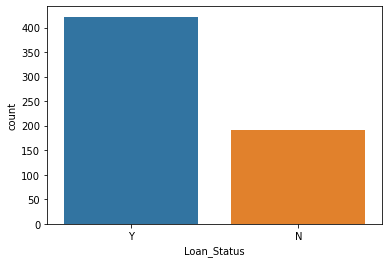

In [47]:
ax=sns.countplot(x='Loan_Status',data=df)
print(df["Loan_Status"].value_counts())

In [48]:
Y=df['Loan_Status']
X=df.drop(columns = ['Loan_Status'])

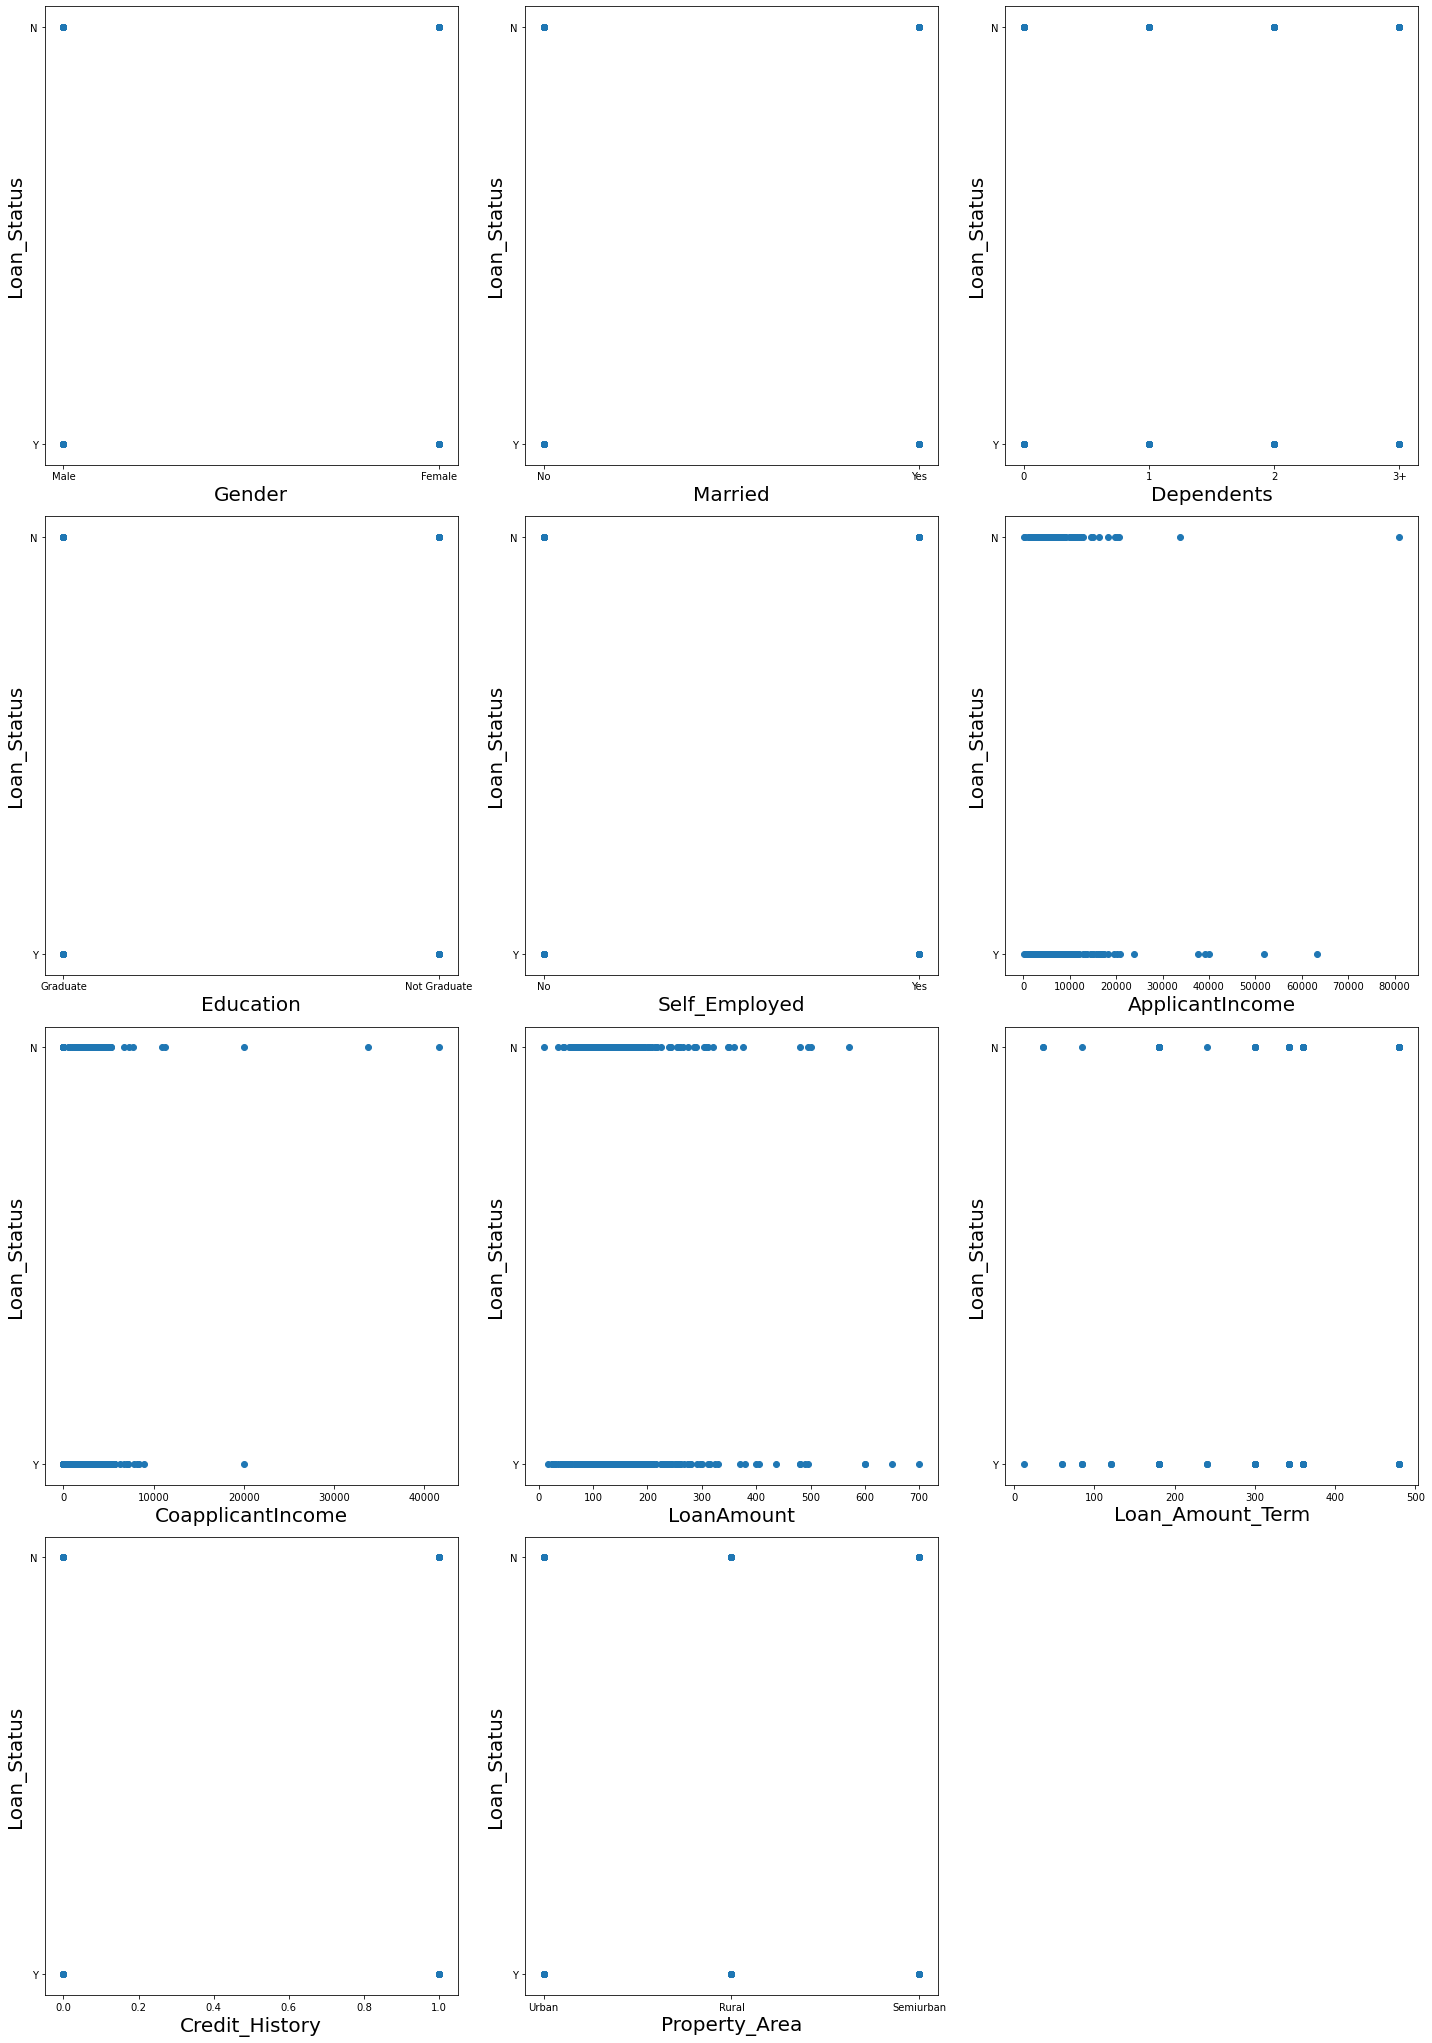

In [49]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan_Status',fontsize=20)
         
    plotnumber+=1
plt.tight_layout()

In [51]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

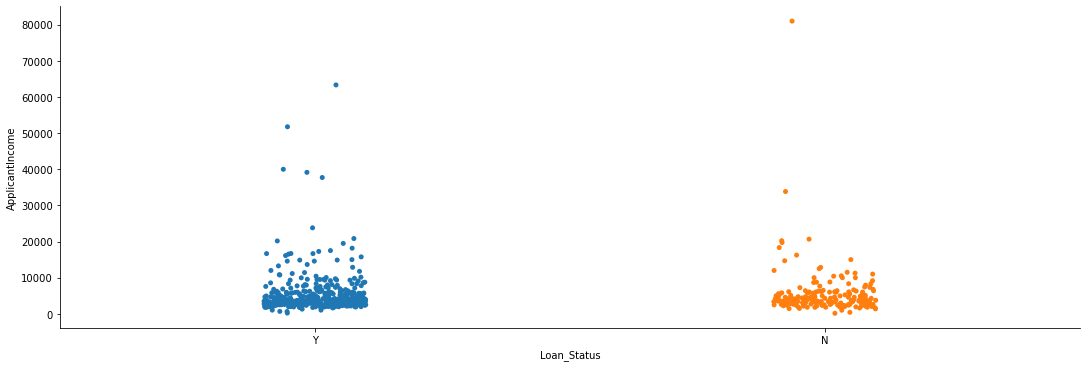

In [57]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',data=df,aspect=3)

In [58]:
#we can't see much differenve to interpret

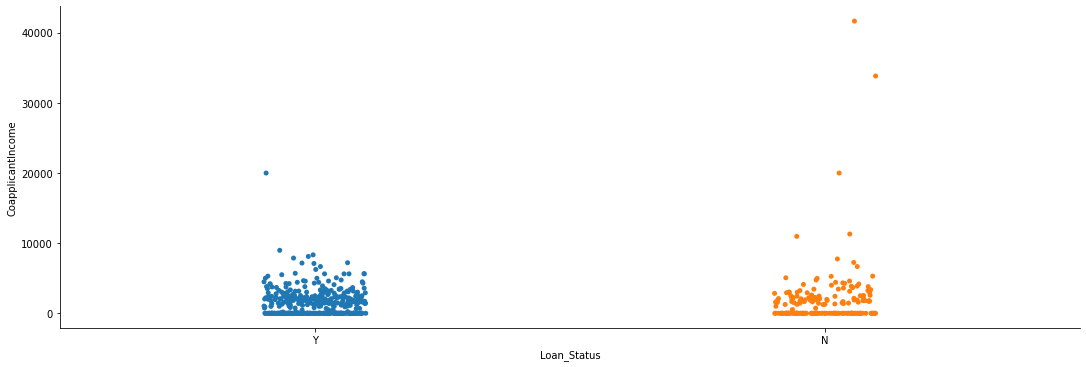

In [60]:
sns.catplot(x='Loan_Status',y='CoapplicantIncome',data=df,aspect=3)

In [62]:
en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [63]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int32
Loan_Amount_Term       int32
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

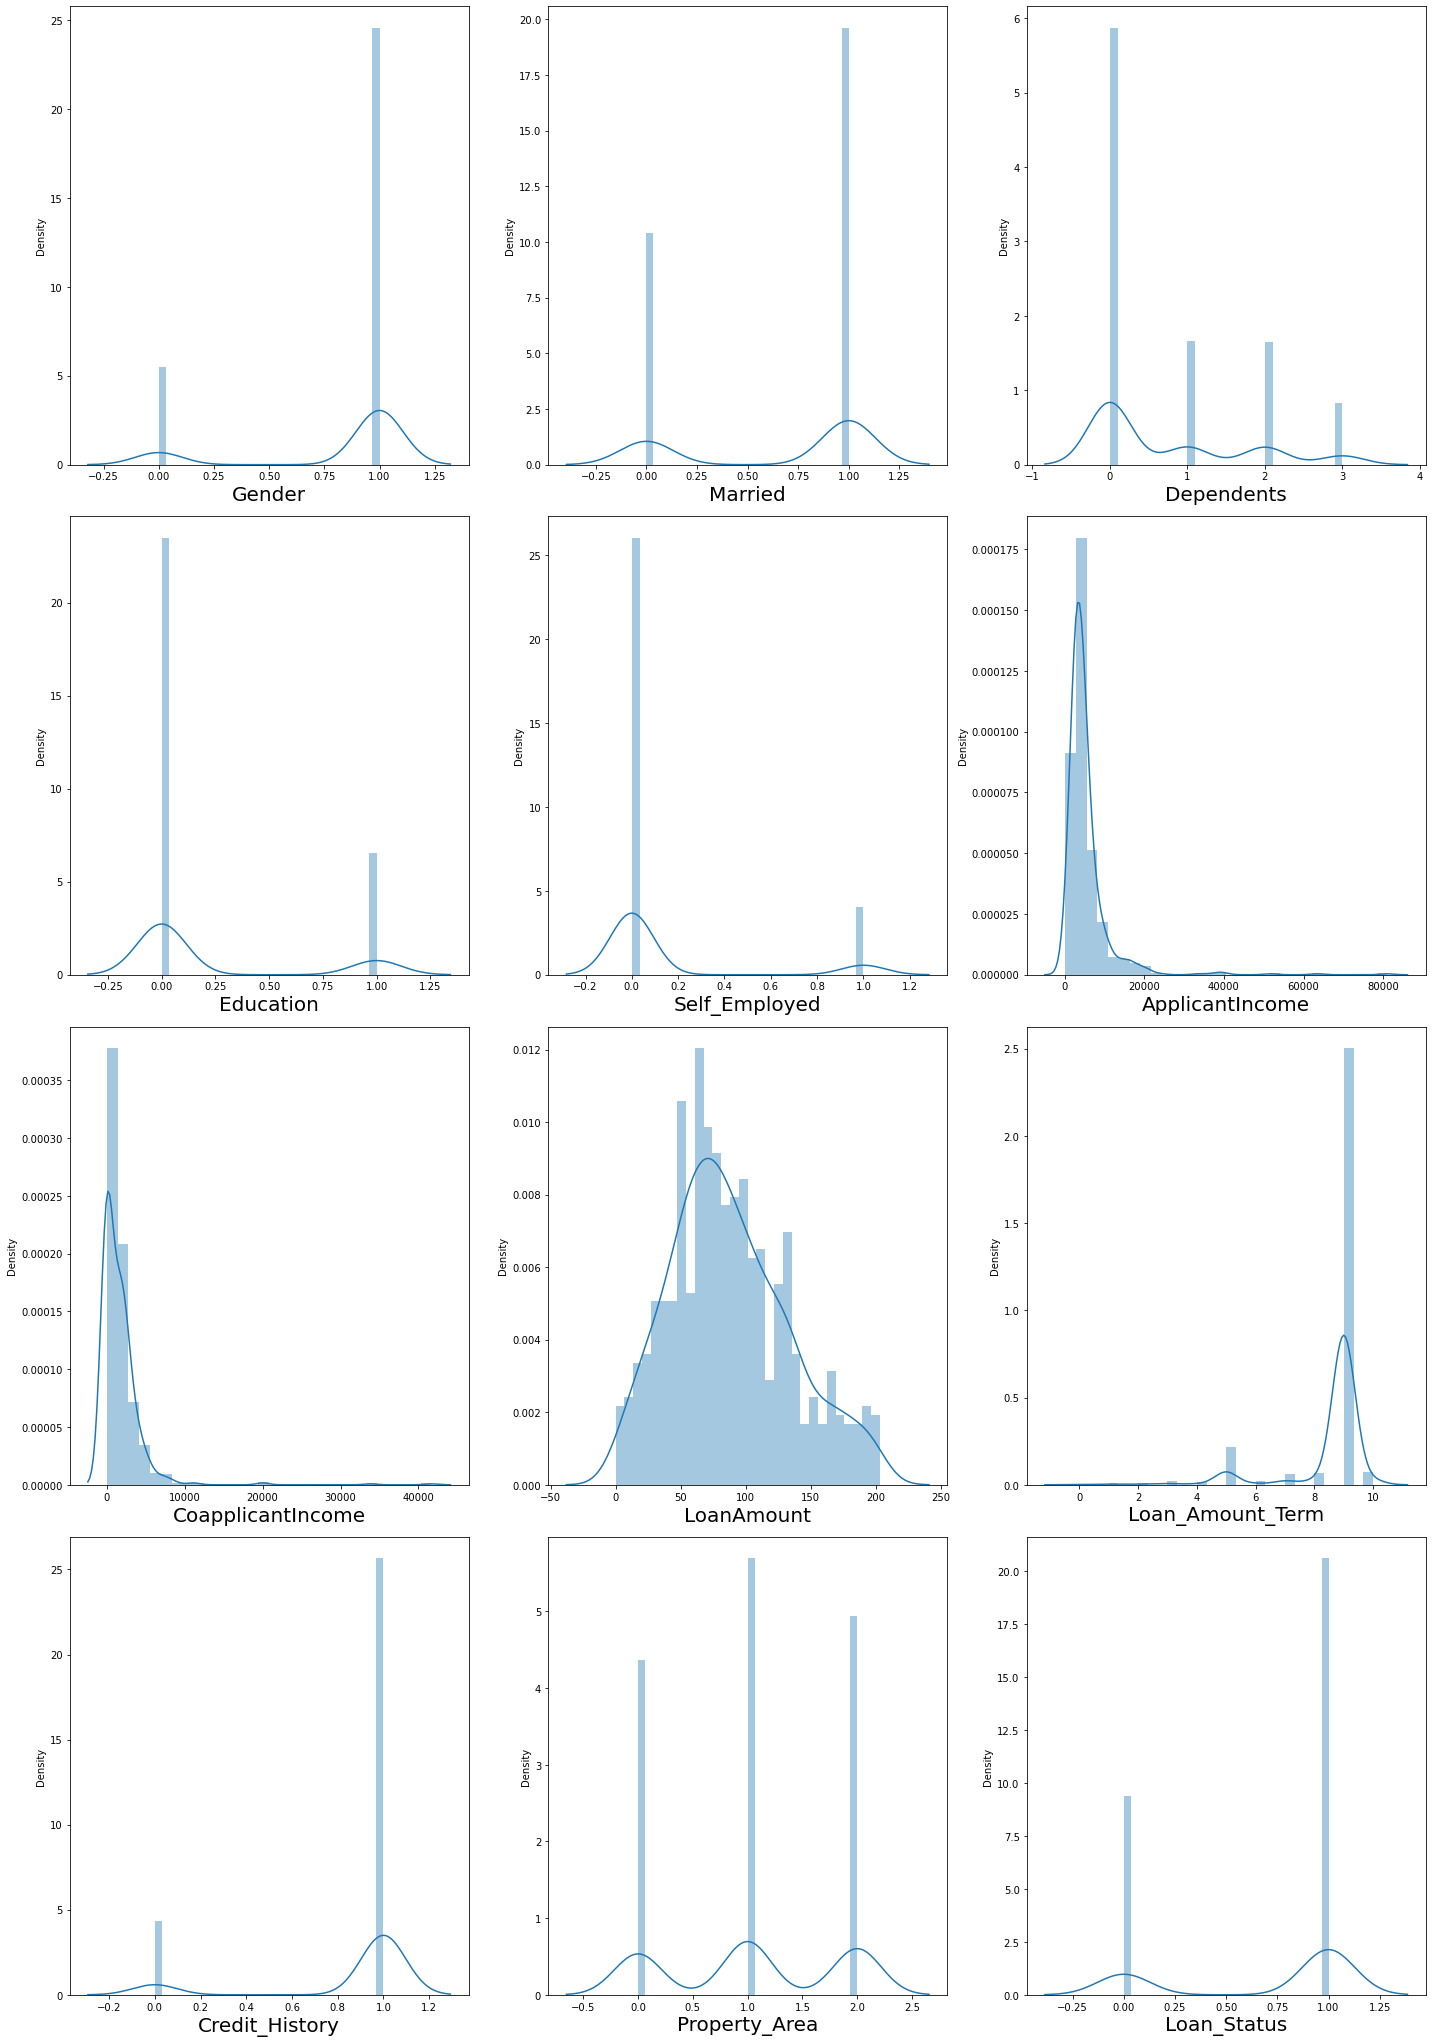

In [64]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber = 1

for  column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [65]:
#we can see skewness in applicant income,Coappicant income,some skewnesss in loanAmount,

In [66]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.151163,-0.069368,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.184857,-0.087657,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.161153,-0.094810,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.172249,-0.088487,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.117717,-0.031174,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.430574,-0.043774,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.212427,-0.057053,0.011134,0.010522,-0.059187
LoanAmount,0.151163,0.184857,0.161153,-0.172249,0.117717,0.430574,0.212427,1.000000,0.065580,-0.000601,-0.084076,-0.049717
Loan_Amount_Term,-0.069368,-0.087657,-0.094810,-0.088487,-0.031174,-0.043774,-0.057053,0.065580,1.000000,0.019184,-0.091598,0.002512
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000601,0.019184,1.000000,0.001963,0.540556


<AxesSubplot:>

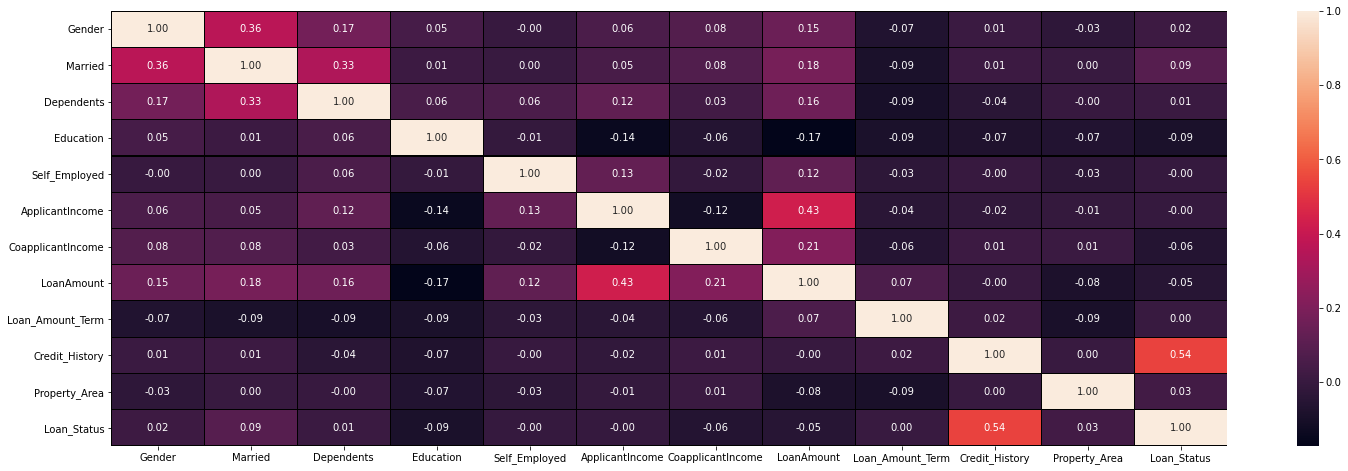

In [67]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

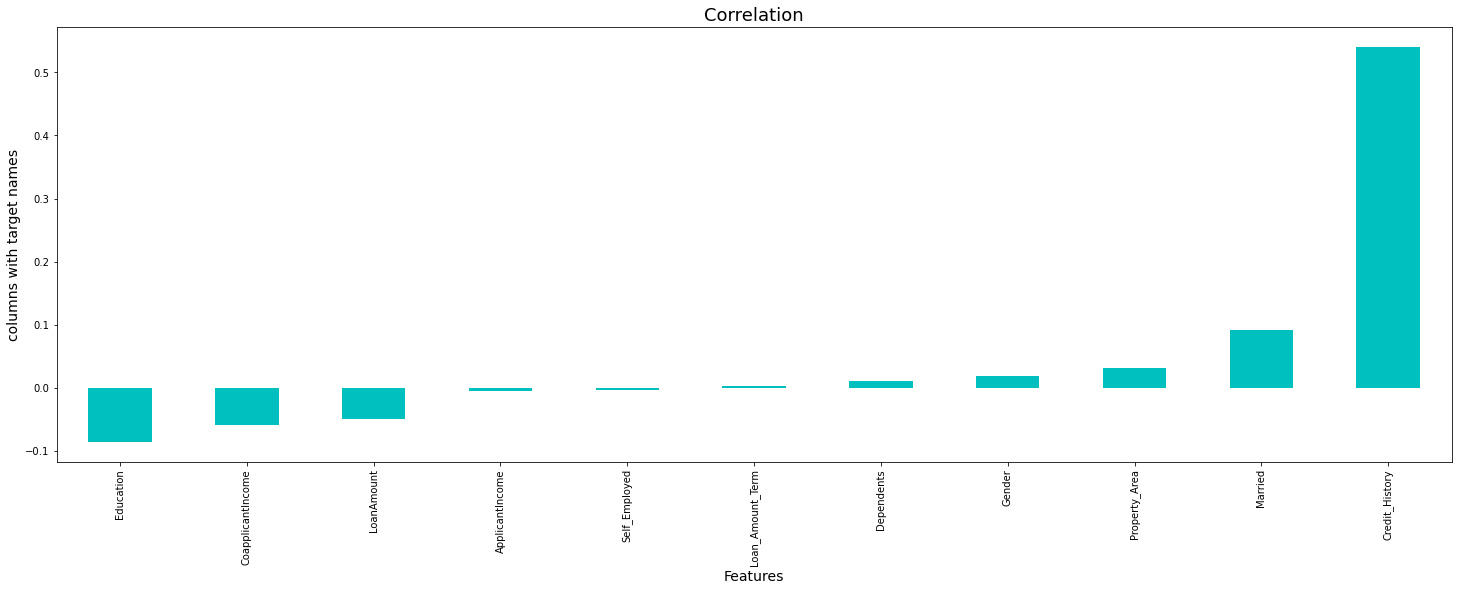

In [70]:
plt.figure(figsize=(25,8))
df.corr()['Loan_Status'].sort_values(ascending=True).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [71]:
#we dont see much correlation only credit history has the highest corr which show if credit history is good
#then loan will be given

In [73]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int32
Loan_Amount_Term       int32
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

In [72]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           0.458715
Loan_Amount_Term    -2.907201
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [77]:
df_new=power_transform(df)


df=pd.DataFrame(df_new,columns=df.columns)


In [78]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.377295
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.284434
CoapplicantIncome   -0.102698
LoanAmount          -0.020568
Loan_Amount_Term     0.720362
Credit_History      -2.021971
Property_Area       -0.041074
Loan_Status         -0.809998
dtype: float64

In [79]:
df.skew()[np.abs(df.skew())<0.5].all()

True

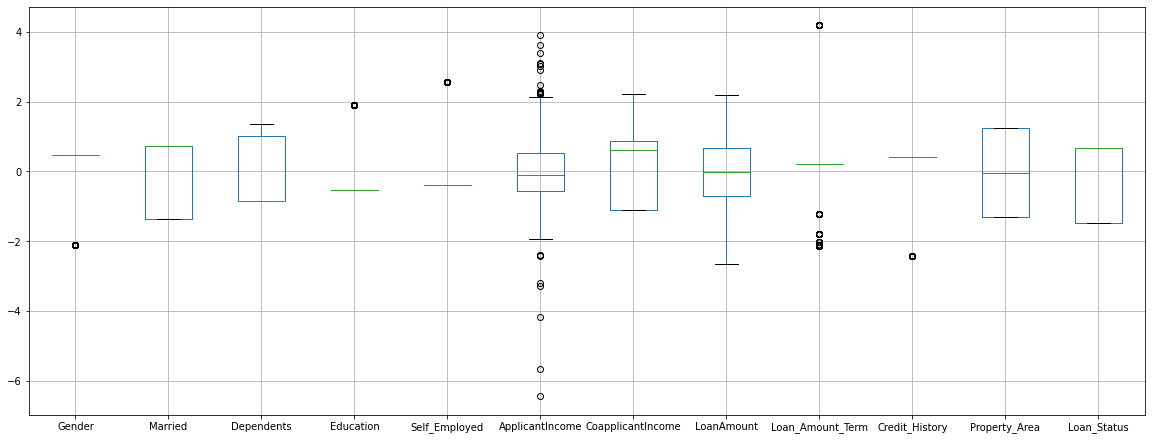

In [80]:
df.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [81]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 75, 109, 130, 155, 168, 171, 179, 185, 188, 216, 228, 248, 293,
        298, 333, 358, 366, 378, 409, 443, 468, 500, 500, 516, 573, 600],
       dtype=int64),
 array([8, 8, 8, 5, 8, 5, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8, 8, 8, 5, 5, 5, 5,
        8, 8, 8, 5], dtype=int64))

In [82]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.836352,-0.528362,-0.392601,0.552034,-1.095406,0.349146,0.203680,0.411733,1.231095,0.674519
1,0.472343,0.728816,1.014807,-0.528362,-0.392601,0.182885,0.710937,-0.051456,0.203680,0.411733,-1.309561,-1.482537
2,0.472343,0.728816,-0.836352,-0.528362,2.547117,-0.491695,-1.095406,-1.461093,0.203680,0.411733,1.231095,0.674519
3,0.472343,0.728816,-0.836352,1.892641,-0.392601,-0.740127,0.882765,-0.229027,0.203680,0.411733,1.231095,0.674519
4,0.472343,-1.372089,-0.836352,-0.528362,-0.392601,0.589878,-1.095406,0.225530,0.203680,0.411733,1.231095,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.836352,-0.528362,-0.392601,-0.547517,-1.095406,-1.366783,0.203680,0.411733,-1.309561,0.674519
610,0.472343,0.728816,1.364868,-0.528362,-0.392601,0.012127,-1.095406,-2.190781,-2.106858,0.411733,-1.309561,0.674519
611,0.472343,0.728816,1.014807,-0.528362,-0.392601,1.020922,0.094038,1.528167,0.203680,0.411733,1.231095,0.674519
612,0.472343,0.728816,1.267009,-0.528362,-0.392601,0.931511,-1.095406,0.990268,0.203680,0.411733,1.231095,0.674519


In [86]:
X=df_new_z.drop("Loan_Status",axis=1)
Y=df_new_z['Loan_Status']

In [87]:
sc=StandardScaler()# standerdizing the data
X=sc.fit_transform(X)
X

array([[ 0.46846739, -1.38413929, -0.83736195, ...,  0.39952044,
         0.40500817,  1.23479909],
       [ 0.46846739,  0.72247064,  1.01644613, ...,  0.39952044,
         0.40500817, -1.300014  ],
       [ 0.46846739,  0.72247064, -0.83736195, ...,  0.39952044,
         0.40500817,  1.23479909],
       ...,
       [ 0.46846739,  0.72247064,  1.01644613, ...,  0.39952044,
         0.40500817,  1.23479909],
       [ 0.46846739,  0.72247064,  1.26900906, ...,  0.39952044,
         0.40500817,  1.23479909],
       [-2.13462029, -1.38413929, -0.83736195, ...,  0.39952044,
        -2.46908597, -0.05456661]])

In [88]:
Y=Y.astype(int)
Y.dtypes

dtype('int32')

In [89]:
lr=LogisticRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {accuracy_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {accuracy_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.8073654390934845
At random state0,the testing  accuracy is :- 0.826271186440678


At random state1,the training accuracy is :- 0.8130311614730878
At random state1,the testing  accuracy is :- 0.809322033898305


At random state2,the training accuracy is :- 0.8441926345609065
At random state2,the testing  accuracy is :- 0.7669491525423728


At random state3,the training accuracy is :- 0.8243626062322946
At random state3,the testing  accuracy is :- 0.8008474576271186


At random state4,the training accuracy is :- 0.8158640226628895
At random state4,the testing  accuracy is :- 0.8135593220338984


At random state5,the training accuracy is :- 0.7988668555240793
At random state5,the testing  accuracy is :- 0.8432203389830508


At random state6,the training accuracy is :- 0.8101983002832861
At random state6,the testing  accuracy is :- 0.8220338983050848


At random state7,the training accuracy is :- 0.8130311614730878
At random state7,the testing

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=32)

In [113]:
pred_test=lr.predict(X_test)
print(accuracy_score(Y_test,pred_test))

0.8050847457627118


In [114]:
Train_accuracy=accuracy_score(Y_train,pred_train)
Test_accuracy=accuracy_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')

At cross fold 2 the cv score is 0.8115703908682117 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 3 the cv score is 0.8064591318761006 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 4 the cv score is 0.8081333884905313 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 5 the cv score is 0.8132551064754455 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 6 the cv score is 0.8149007077578506 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 7 the cv score is 0.8132252901160465 and accuracy score for training is 0.6203966005665722 and accuracy score for testing is 0.8050847457627118


At cross fold 8 the cv score is 0.813356

In [115]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [116]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=i)
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute','ball_tree'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsClassifier()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 3}


In [117]:
kn= KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',knn*100)
knscore=cross_val_score(kn,X,Y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

accuracy_score: 71.61016949152543
cross_val_score: 70.9630316773174


In [118]:
y_pred_kn = kn.predict(X_test)
print("KNeighborsClassifier report: \n\n", classification_report(Y_test, y_pred_kn))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

          -1       0.50      0.42      0.46        67
           0       0.78      0.83      0.81       169

    accuracy                           0.72       236
   macro avg       0.64      0.63      0.63       236
weighted avg       0.70      0.72      0.71       236



In [105]:
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt'}


In [106]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',rfs*100)
rfscore=cross_val_score(rf,X,Y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

accuracy_score: 79.23728813559322
cross_val_score: 80.30303030303031


In [107]:
y_pred_rf = rf.predict(X_test)
print("RandomRainforestClassifier report: \n\n", classification_report(Y_test, y_pred_rf))

RandomRainforestClassifier report: 

               precision    recall  f1-score   support

          -1       0.74      0.42      0.53        67
           0       0.80      0.94      0.87       169

    accuracy                           0.79       236
   macro avg       0.77      0.68      0.70       236
weighted avg       0.78      0.79      0.77       236



In [108]:
from sklearn.tree import DecisionTreeClassifier


parameters={'criterion':["gini", "entropy"],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random'}


In [110]:
dt=DecisionTreeClassifier(criterion='gini',max_features='auto',splitter='random')
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dts=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',dts*100)
dtscore=cross_val_score(dt,X,Y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

accuracy_score: 70.33898305084746
cross_val_score: 74.3661100803958


In [111]:
y_pred_dt = dt.predict(X_test)
print("DecisionTreeClassifier report: \n\n", classification_report(Y_test, y_pred_dt))

DecisionTreeClassifier report: 

               precision    recall  f1-score   support

          -1       0.48      0.43      0.45        67
           0       0.78      0.81      0.80       169

    accuracy                           0.70       236
   macro avg       0.63      0.62      0.62       236
weighted avg       0.70      0.70      0.70       236



In [119]:
#as we can see randomrainforest is giving the best score

In [120]:
filename='loan_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [121]:
loaded_model=pickle.load(open('loan_prediction.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.7923728813559322


In [122]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
Predicted,0,0,0,0,0,-1,0,-1,0,0,...,0,0,0,-1,0,-1,-1,0,0,0
Original,-1,-1,0,0,0,-1,0,-1,0,0,...,0,0,-1,-1,0,-1,-1,0,0,0


In [123]:
# this is the model